<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Inverted_Bisection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function that takes in the head of a Singly Linked List, inverts its bisection in place (i.e., doesn't create a brand new list), and returns its new head.

Inverting a Linked List's bisection means inverting the order of the nodes in the list's two halves; see the sample inputs and outputs for examples.

Each `LinkedList` node has an integer `value` as well as a `next` node pointing to the next node in the list or to `None` / `null` if it's the tail of the list.

You can assume that the input Linked List will always have at least one node; in other words, the head will never be `None` / `null`.

Sample Input #1

```
head = 0 -> 1 -> 2 -> 3 -> 4 -> 5 // the head node with value 0
```



Sample Output #1

```
2 -> 1 -> 0 -> 5 -> 4 -> 3 // the new head node with value 2
```



Sample Input #2

```
head = 0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 // the head node with value 0
```



In [1]:
# This is an input class. Do not edit.
class LinkedList:
  def __init__(self, value):
    self.value = value
    self.next = None

  def __str__(self):
    node = self
    output_str = ''
    while node != None:
      output_str = output_str + str(node.value)
      if node.next != None:
        output_str = output_str + ' -> '
      node = node.next
    return output_str

# Time O(n)
# Space O(1)
def invertedBisection(head):
  length = find_length(head)
  if length == 1:
    return head
  if length % 2 == 0:
    tail1 = find_node_at_position(head, length / 2)
    head2 = find_node_at_position(head, length / 2 + 1)
    tail2 = find_node_at_position(head, length)
    
    new_head1 = reverse_linked_list(head, tail1)
    new_head2 = reverse_linked_list(head2, tail2)

    new_head = connect(new_head1, new_head2)
  else:
    middle = find_node_at_position(head, length // 2 + 1)
    tail1 = find_node_at_position(head, length // 2)
    head2 = find_node_at_position(head, length // 2 + 2)
    tail2 = find_node_at_position(head, length)


    new_head1 = reverse_linked_list(head, tail1)
    new_head2 = reverse_linked_list(head2, tail2)
    middle.next = None

    new_head = connect(new_head1, middle)
    new_head = connect(new_head, new_head2)

  return new_head

def connect(head1, head2):
  node = head1
  while node.next != None:
    node = node.next
  node.next = head2
  return head1

def find_node_at_position(head, target_position):
  position = 1
  node = head
  while position != target_position:
    node = node.next
    position += 1
  return node

def find_length(head):
  length = 0
  node = head
  while node != None:
    length += 1
    node = node.next
  return length

def reverse_linked_list(head, tail):
  p0 = None
  p1 = head
  p2 = head.next

  while p1 != tail:
    p1.next = p0
    p0 = p1
    p1 = p2
    p2 = p2.next
  
  p1.next = p0

  return p1

In [2]:
def create_link_list(array):
  head = LinkedList(array[0])
  node = head
  for i in range(1, len(array)):
    node.next = LinkedList(array[i])
    node = node.next
  return head

In [3]:
head = create_link_list(range(6))
print(head)
new_head = invertedBisection(head)
print(new_head)

0 -> 1 -> 2 -> 3 -> 4 -> 5
2 -> 1 -> 0 -> 5 -> 4 -> 3


In [4]:
head = create_link_list(range(7))
print(head)
new_head = invertedBisection(head)
print(new_head)

0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6
2 -> 1 -> 0 -> 3 -> 6 -> 5 -> 4


In [5]:
head = create_link_list([0])
print(head)
new_head = invertedBisection(head)
print(new_head)

0
0


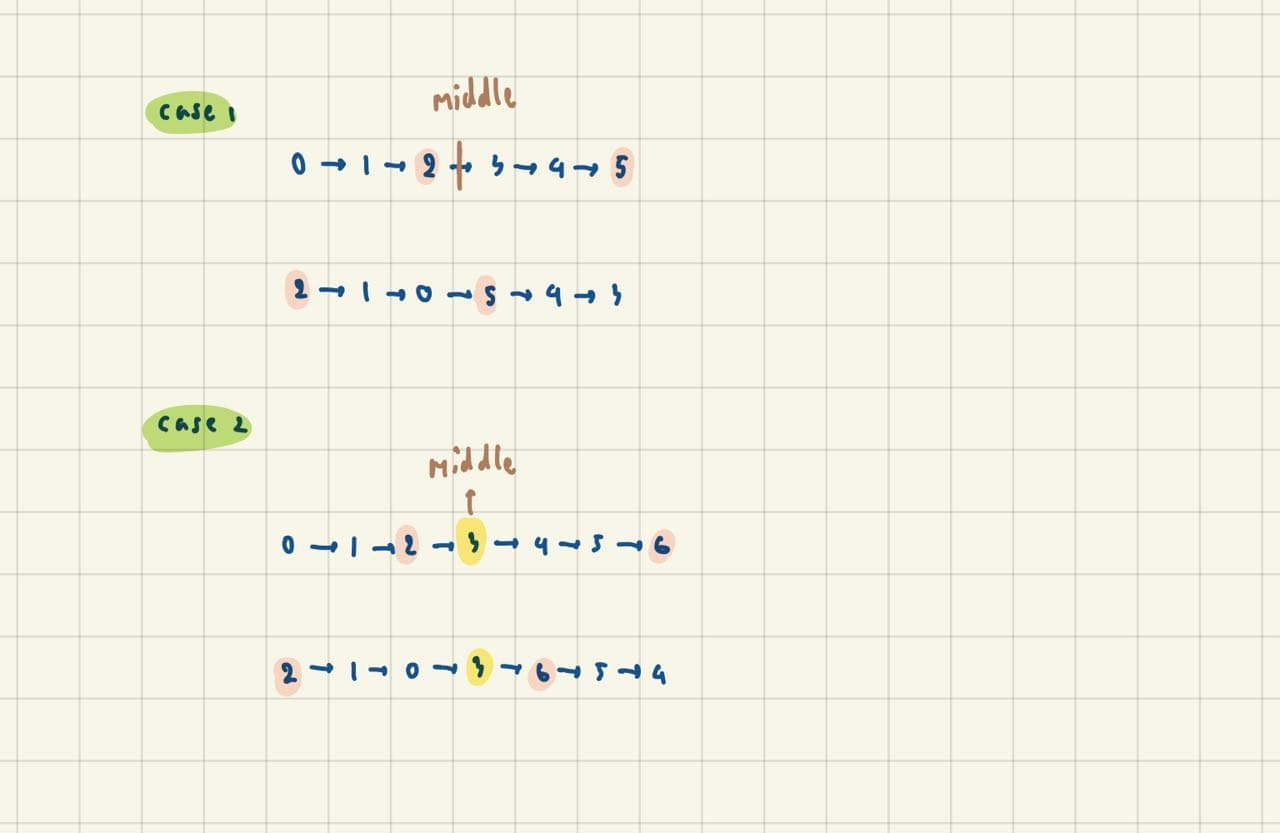